In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox

In [2]:
airlines = pd.read_csv('Data/2008.csv')

In [3]:
airlines['UniqueCarrier'].value_counts()

WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
EV     280575
9E     262208
FL     261684
YV     254930
OH     197607
B6     196091
AS     151102
F9      95762
HA      61826
AQ       7800
Name: UniqueCarrier, dtype: int64

In [4]:
AA = pd.DataFrame(airlines[airlines['UniqueCarrier'] == 'AA'])

In [5]:
AA = AA.drop(columns=['UniqueCarrier', 'Year'])

In [6]:
AA = AA.drop(columns=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','Cancelled','CancellationCode','ActualElapsedTime','CRSElapsedTime'])

In [7]:
AA = AA.drop(columns=['DepTime', 'ArrTime'])

In [8]:
AA = AA.drop(columns=['TailNum'])

In [9]:
AAmin = pd.DataFrame(AA[AA['ArrDelay'] > 30])

In [10]:
AAmin.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted
477142,1,27,7,900,1225,1,357.0,32.0,-1.0,JFK,LAX,2475,14.0,47.0,0
477157,1,11,5,930,1750,2,286.0,130.0,58.0,LAX,JFK,2475,33.0,73.0,0
477160,1,14,1,930,1750,2,308.0,36.0,11.0,LAX,JFK,2475,18.0,19.0,0
477181,1,4,5,1200,1510,3,347.0,38.0,27.0,JFK,LAX,2475,8.0,26.0,0
477193,1,16,3,1200,1510,3,327.0,37.0,51.0,JFK,LAX,2475,5.0,24.0,0


(array([4.8958e+04, 2.2690e+04, 1.2089e+04, 6.8490e+03, 3.8800e+03,
        2.2930e+03, 1.3670e+03, 8.1600e+02, 4.9100e+02, 3.4200e+02,
        1.9100e+02, 1.5400e+02, 8.9000e+01, 5.9000e+01, 2.7000e+01,
        2.8000e+01, 2.6000e+01, 1.6000e+01, 1.3000e+01, 9.0000e+00,
        5.0000e+00, 7.0000e+00, 8.0000e+00, 9.0000e+00, 9.0000e+00,
        1.1000e+01, 8.0000e+00, 1.3000e+01, 2.1000e+01, 6.0000e+00,
        1.2000e+01, 7.0000e+00, 1.0000e+01, 1.2000e+01, 5.0000e+00,
        8.0000e+00, 8.0000e+00, 5.0000e+00, 6.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 6.0000e+00, 2.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  31.  ,   60.88,   90.76,  120.64,  150.52,  180.4 ,  210.28,
         240.16,  270.04,  299.92,  329.8 ,  359.68,  389.56,  419.44,
         449.32,  479.2 ,  509.08,  538.96,  568.84,  598.72,  628.6 ,
         658.48,  688.36,  718.24,  748.12,  778.  ,  807.88,  837.76,
         867.64,  897.52,  927.4 ,

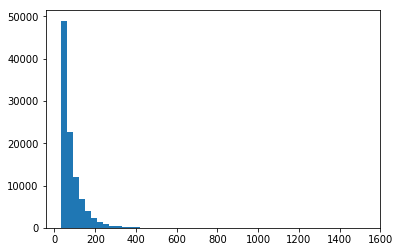

In [11]:
plt.hist(AAmin['ArrDelay'],bins = 50)

In [12]:
AAmindum = pd.get_dummies(AAmin)
columns = AAmindum.columns
list(AAmin.columns)


['Month',
 'DayofMonth',
 'DayOfWeek',
 'CRSDepTime',
 'CRSArrTime',
 'FlightNum',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Diverted']

In [13]:
#preprocessing
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(AAmindum)
scaled_df = pd.DataFrame(scaled_df, columns = columns)

In [14]:
#linear regression
from sklearn import linear_model

In [15]:
regr = linear_model.LinearRegression()
Y = AAmindum['ArrDelay']
X = AAmindum.drop(columns = ['ArrDelay'])
regr.fit(X, Y)

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [-1.83598968e-02 -1.47684818e-02 -5.10763504e-02  1.68884548e-03
 -3.00252705e-03 -2.50587294e-04  8.09384391e-01  9.86650759e-01
 -9.47847662e-02  9.43305966e-01  9.80345309e-01  6.84155014e-14
  7.73010329e+00  1.85868570e+01 -1.20139237e+01  2.40768287e+00
 -1.00278460e+01 -2.19238290e+00  8.06505559e-01 -1.92652614e+01
  5.25861375e+00 -1.19907445e+01 -9.82193405e+00 -4.85255840e+00
  4.91896166e+00 -7.64481998e+00 -9.48002554e+00  2.99325537e+00
 -1.91974845e+00 -8.28536980e+00  5.62568212e-01  6.42116906e+00
 -2.42930497e+01  5.05180241e+00 -1.17836283e+01 -3.70230501e+00
  9.53017209e+00  3.40012727e+00  2.93026657e+01 -4.52231829e+00
 -7.64961222e+00 -2.90498450e+00  4.45054447e+00 -5.20209936e+00
  3.05285016e+00 -5.73431225e+00 -2.71214478e+01  3.31720710e+01
  6.40437232e+00  4.78376008e+00 -2.50099228e+01  3.30471324e+01
  1.44946832e+00 -8.12583465e+00  3.96660312e-01  5.20881974e+00
 -9.29284336e+00 -3.55146146e+00  4.77314840e-01  4.81205725e+00
  3.5827

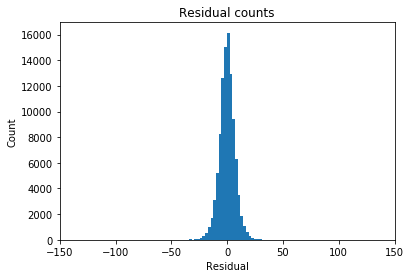

In [17]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = AAmindum['ArrDelay']

# Calculate the residual.
residual = actual - predicted


plt.hist(residual,bins = 150)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.xlim(-150,150)
plt.show()

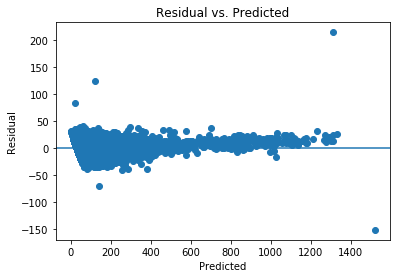

In [18]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()